In [2]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
################### reading files ####################
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200131a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200131a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200131a_R0.dat',skiprows = 34, delim_whitespace=True)
#nav = pd.read_csv('Nav_IMS0000_02022020.Asc',skiprows=14, header=None,delim_whitespace=True)
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db,time_bac

(             F_dw     f_dir
 sod                        
 52874  812.867981  0.854390
 52994  815.783997  0.854104
 53114  819.362305  0.854501
 53234  822.866577  0.854889
 53354  826.419067  0.855383
 ...           ...       ...
 76779  148.439575  0.894848
 76899  139.220245  0.890260
 77019  129.127884  0.884625
 77139  118.135651  0.877797
 77259  106.201439  0.869172
 
 [204 rows x 2 columns],            time
 0       54516.0
 1       54516.1
 2       54516.2
 3       54516.3
 4       54516.4
 ...         ...
 316985  86214.5
 316986  86214.6
 316987  86214.7
 316988  86214.8
 316989  86214.9
 
 [316990 rows x 1 columns])

In [3]:
array = np.arange(52874,86215, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)

data_int.reset_index(inplace=True)
data_int.drop(data_int.index[0:16420],inplace=True)
data_int.columns=['time','F_dw','f_dir']
data_int.reset_index(inplace=True,drop=True)
data_int
#data_int['time']=data_int.loc[:,'index']
#data_int[data_int['index']==54516]
#df_r = data_int.iloc[0:16420,:]
#df_r

,time,F_dw,f_dir
0,54516,870.700818,0.871680
1,54516,870.721712,0.871697
2,54516,870.742606,0.871713
3,54516,870.763500,0.871730
4,54516,870.784394,0.871746
...,...,...,...
316985,86214,106.201439,0.869172
316986,86214,106.201439,0.869172
316987,86214,106.201439,0.869172
316988,86214,106.201439,0.869172


In [4]:
fdw = data_int.loc[:,'F_dw']
fdir = data_int.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,54516,956.068298,39.567757,397.434845,561.926392,151.514816,55.766167,870.700818,0.871680
1,54516,956.946960,39.642384,398.925720,561.567749,151.515549,55.766376,870.721712,0.871697
2,54516,956.862305,39.992012,400.440247,560.885620,151.516281,55.766590,870.742606,0.871713
3,54516,956.345032,39.525589,406.287018,559.920410,151.517014,55.766800,870.763500,0.871730
4,54516,955.073120,38.434147,407.689667,560.424927,151.517746,55.767014,870.784394,0.871746
...,...,...,...,...,...,...,...,...,...
316985,86214,-1.786822,-1.155517,397.226501,477.821564,-102.524818,-28.092676,106.201439,0.869172
316986,86214,-0.402841,-1.498432,390.457123,478.839905,-102.524757,-28.093126,106.201439,0.869172
316987,86214,-1.585936,-1.464381,402.565216,478.492645,-102.524696,-28.093578,106.201439,0.869172
316988,86214,-1.020375,-0.607635,397.552338,479.333557,-102.524635,-28.094028,106.201439,0.869172


In [5]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,54516,956.068298,39.567757,397.434845,561.926392,151.514816,55.766167,870.700818,0.871680,1.256950,4.755988,75.600647
1,54516,956.946960,39.642384,398.925720,561.567749,151.515549,55.766376,870.721712,0.871697,1.273390,5.193901,75.580078
2,54516,956.862305,39.992012,400.440247,560.885620,151.516281,55.766590,870.742606,0.871713,1.268618,5.616010,75.544838
3,54516,956.345032,39.525589,406.287018,559.920410,151.517014,55.766800,870.763500,0.871730,1.252988,6.010212,75.492363
4,54516,955.073120,38.434147,407.689667,560.424927,151.517746,55.767014,870.784394,0.871746,1.214480,6.356789,75.432083
...,...,...,...,...,...,...,...,...,...,...,...,...
316985,86214,-1.786822,-1.155517,397.226501,477.821564,-102.524818,-28.092676,106.201439,0.869172,-0.197458,2.405763,75.327660
316986,86214,-0.402841,-1.498432,390.457123,478.839905,-102.524757,-28.093126,106.201439,0.869172,-0.133542,2.558964,75.318375
316987,86214,-1.585936,-1.464381,402.565216,478.492645,-102.524696,-28.093578,106.201439,0.869172,-0.035365,2.647578,75.288445
316988,86214,-1.020375,-0.607635,397.552338,479.333557,-102.524635,-28.094028,106.201439,0.869172,0.106021,2.676054,75.283760


In [6]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
#df_bigg.to_csv('df_bigg_31jan.csv')

In [7]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(86214)

[23, 56, 54]

In [8]:
import datetime
start = datetime.datetime(2020, 1, 31, 15, 8, 36)
end = datetime.datetime(2020, 1, 31, 23, 56, 54)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg.to_csv('df_bigg_31jan.csv')

In [49]:
#x = df_bigg.loc[:,'shortwave_down_corrected'] > 3000
#x[x].index
df_bigg.drop(df_big.index[0:996],inplace=True)

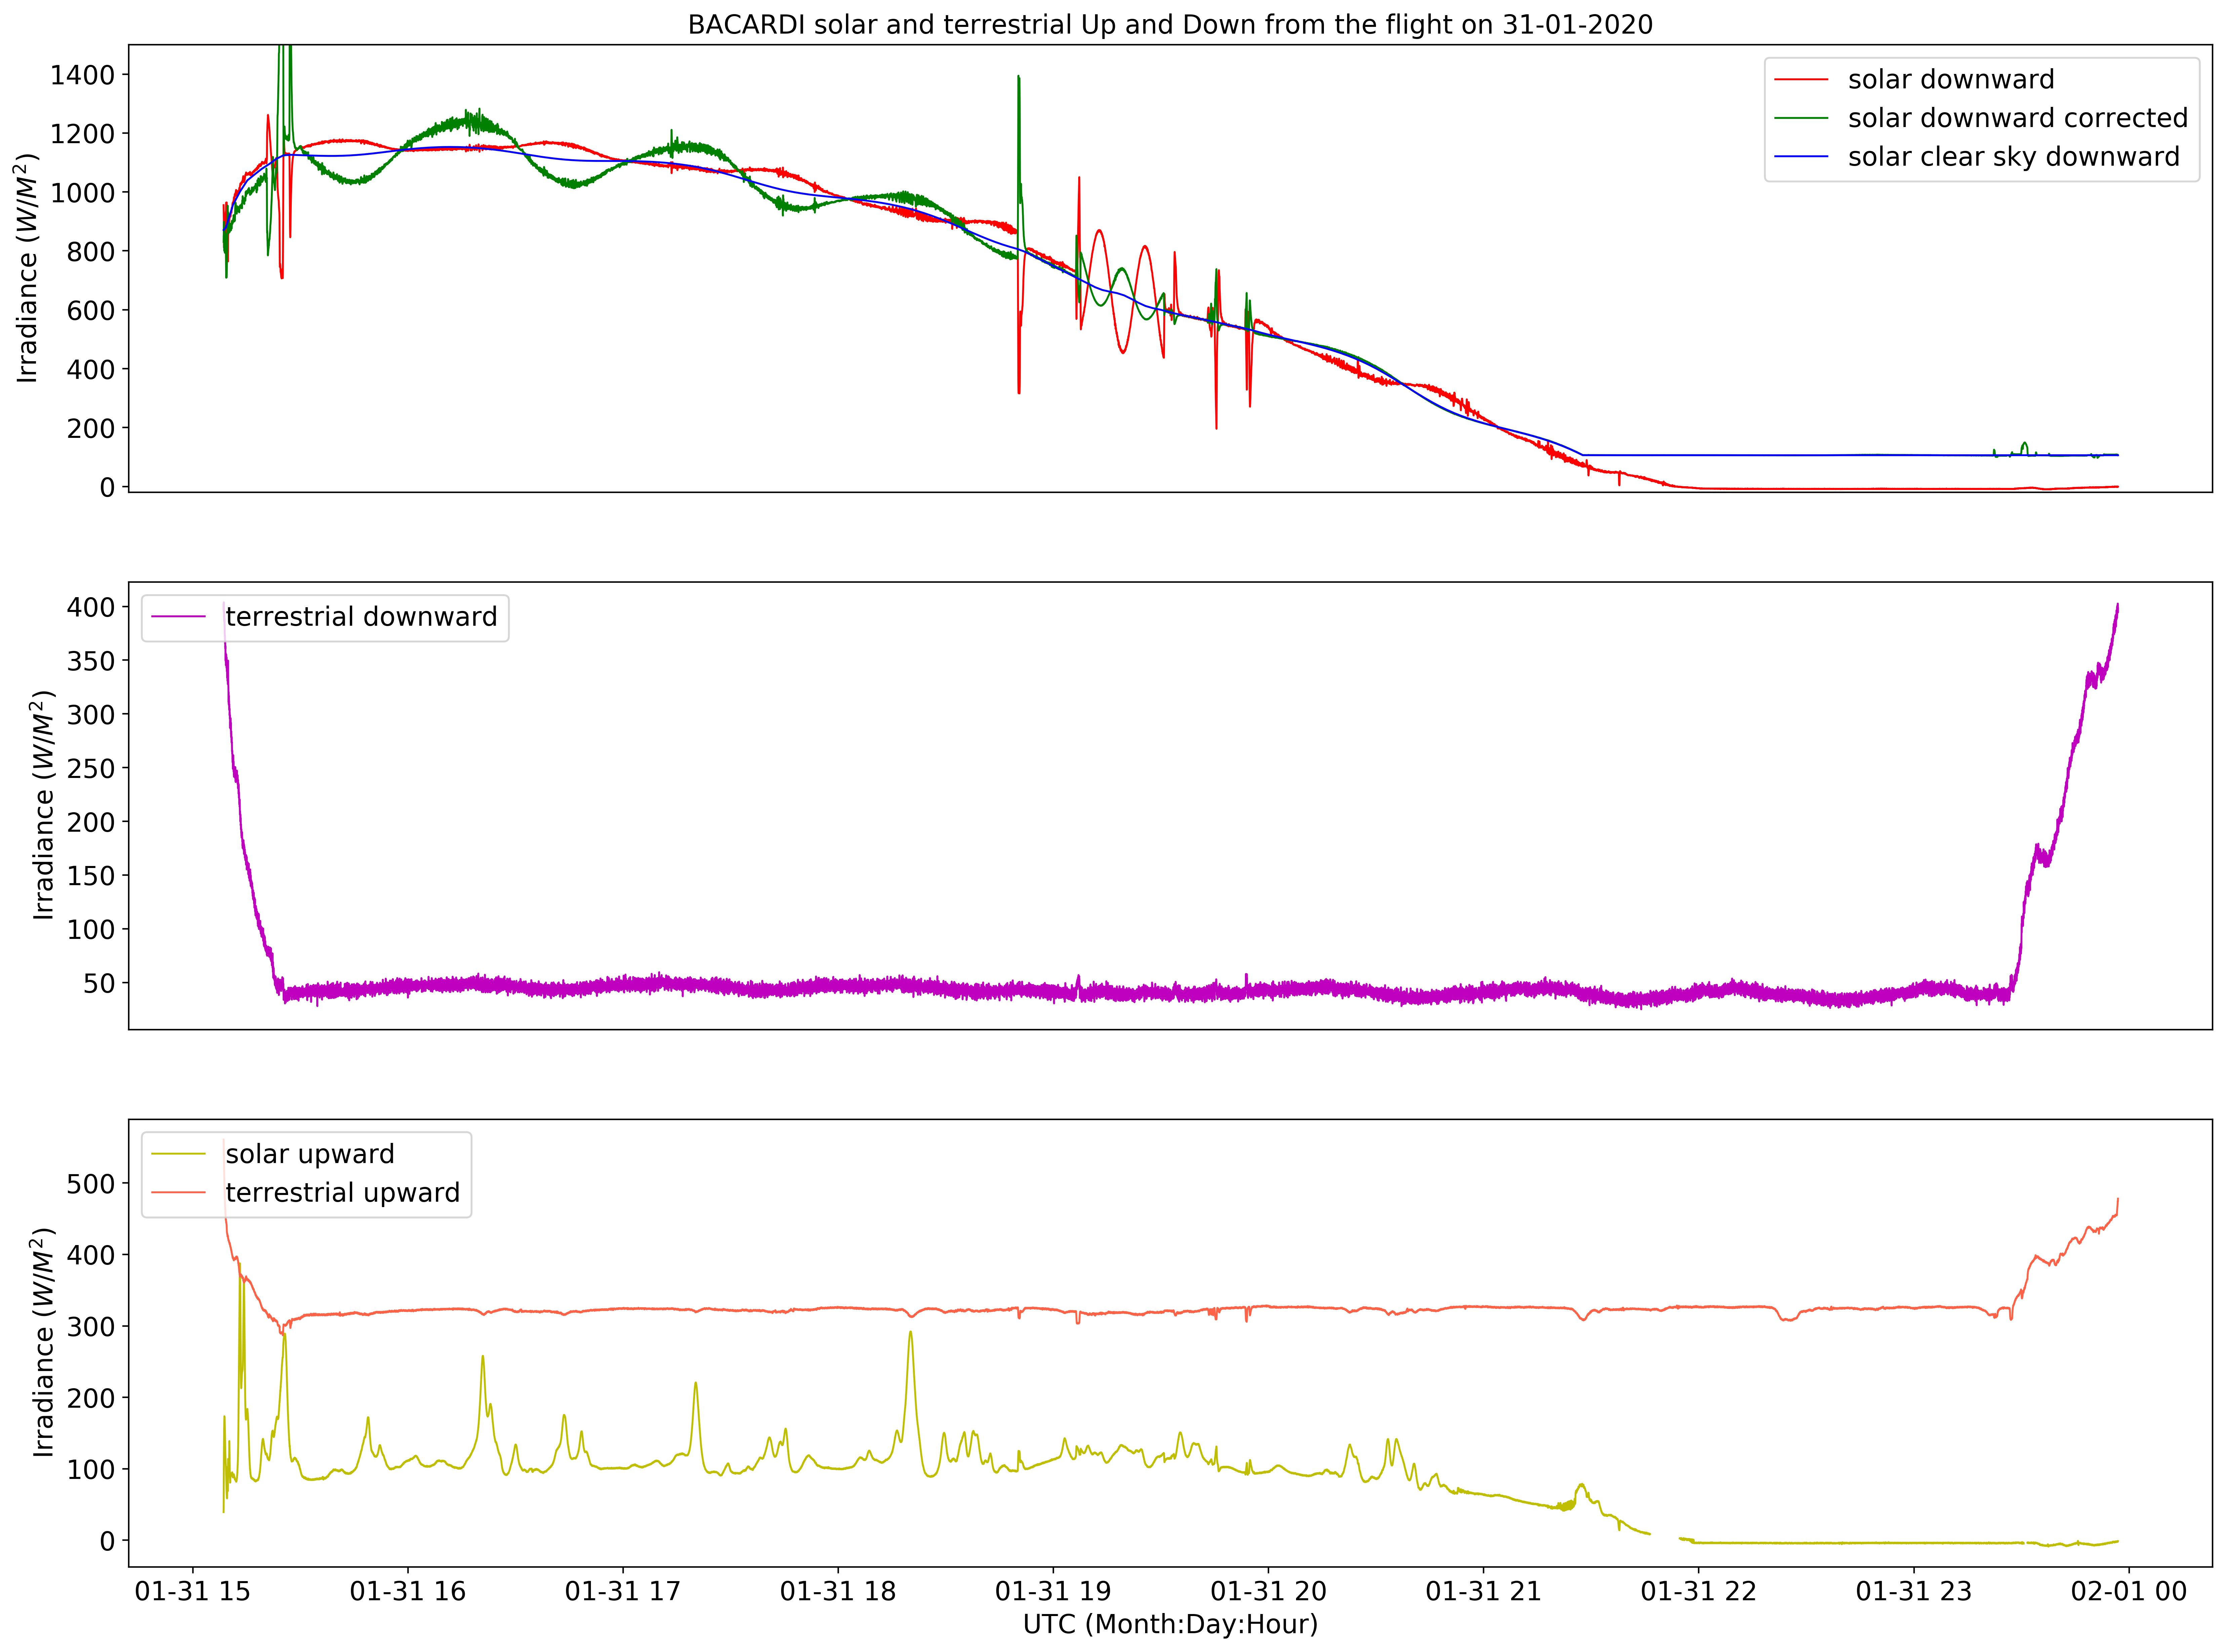

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.ylim(-20,1500)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 31-01-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper right')
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()

In [40]:
df_biggg = pd.read_csv('df_bigg_31jan.csv',)
df_biggg

,Unnamed: 0,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw,shortwave_down_corrected,time
0,975,55491,711.447630,242.725460,48.011887,289.97205,159.54422,58.054653,1121.798372,0.976119,26.924970,5.645855,255.998600,7355.035730,2020-01-31 15:24:51
1,976,55492,714.337700,243.354020,47.243137,291.16495,159.54799,58.055977,1121.901916,0.976149,26.874474,5.772695,257.386230,7292.990786,2020-01-31 15:24:52
2,977,55493,716.554750,245.261730,51.414520,290.37088,159.55177,58.057260,1122.005461,0.976179,27.057394,5.829390,258.750240,7580.353573,2020-01-31 15:24:53
3,978,55494,716.509800,246.586150,48.031406,291.21384,159.55557,58.058495,1122.109005,0.976209,27.275507,5.941040,260.144530,7945.649994,2020-01-31 15:24:54
4,979,55495,715.931500,247.671190,52.180058,291.21250,159.55939,58.059680,1122.212550,0.976239,27.249804,6.063630,261.541230,7865.012825,2020-01-31 15:24:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30719,31694,86210,-1.017870,-1.705135,402.604500,473.38983,-102.52728,-28.074385,106.201439,0.869172,0.672507,0.927721,75.894640,107.440148,2020-01-31 23:56:50
30720,31695,86211,-0.786037,-1.201333,401.367280,474.70883,-102.52667,-28.078907,106.201439,0.869172,0.547112,1.466720,75.866470,106.952205,2020-01-31 23:56:51
30721,31696,86212,-0.926215,-1.296503,402.300630,474.23123,-102.52606,-28.083426,106.201439,0.869172,0.155781,2.189286,75.746704,106.314265,2020-01-31 23:56:52
30722,31697,86213,-0.973231,-1.486749,394.338620,475.65510,-102.52545,-28.087942,106.201439,0.869172,-0.366423,1.687503,75.549355,106.765445,2020-01-31 23:56:53


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_biggg.time,df_biggg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_biggg.time,df_biggg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_biggg.time,df_biggg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 13-02-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(312)
plt.plot(df_biggg.time,df_biggg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_biggg.time,df_biggg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_biggg.time,df_biggg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()